In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-06-18 14:43:22.683915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750257802.850689      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750257802.898959      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_path = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/'
train_gen= ImageDataGenerator(rescale=1./255,
                             horizontal_flip=True,
                             validation_split=0.2)

In [3]:
train_set = train_gen.flow_from_directory(train_path,
                                         target_size=(128,128),
                                         batch_size=32,
                                         class_mode="sparse",
                                         subset='training')
valid_set= train_gen.flow_from_directory(train_path,
                                        target_size=(128,128),
                                        batch_size=32,
                                        class_mode='sparse',
                                        subset="validation")

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [4]:
classes = {v: k for k,v in train_set.class_indices.items()}
print(classes)

{0: 'Parasitized', 1: 'Uninfected'}


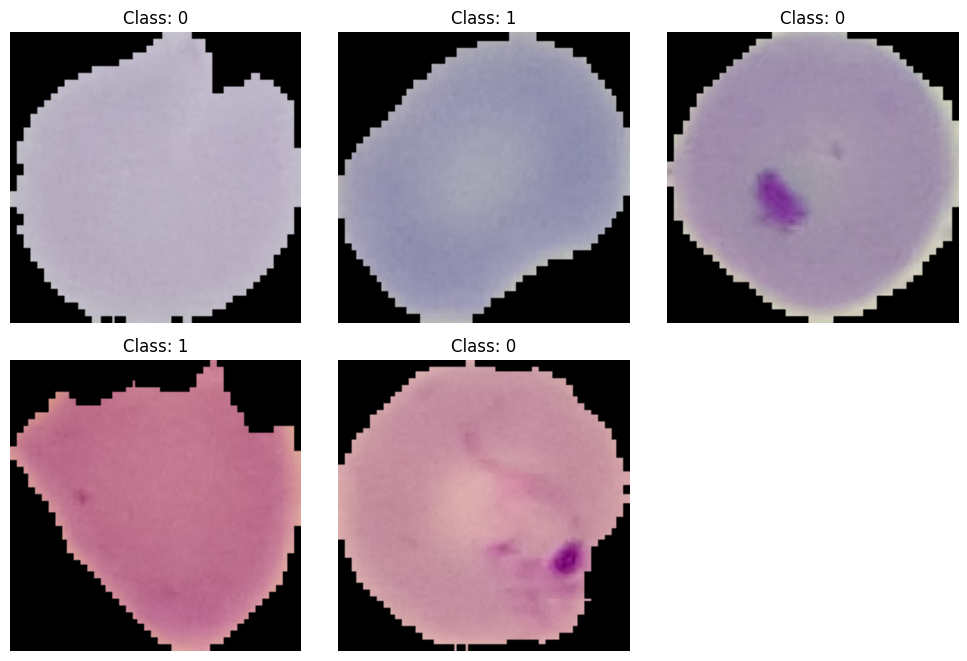

In [5]:
# Get a batch of images and labels
images, labels = next(train_set)

# Plot the first 9 images
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {int(labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
#Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,7,input_shape=(128,128,3)),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=2, padding='same'),
    
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same",
                           activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), padding="same"),


    tf.keras.layers.Conv2D(filters=120, kernel_size=(5, 5), padding="same",
                           activation='relu'),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(2,activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750257844.554175      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750257844.554923      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [7]:
model.compile(optimizer = "adam" , loss="sparse_categorical_crossentropy", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1750257847.854900      81 service.cc:148] XLA service 0x7995a000e760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750257847.855521      81 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750257847.855545      81 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750257848.123590      81 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/689 ━━━━━━━━━━━━━━━━━━━━ 1:03:19 6s/step - accuracy: 0.3125 - loss: 0.7237

I0000 00:00:1750257851.548055      81 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


689/689 ━━━━━━━━━━━━━━━━━━━━ 165s 231ms/step - accuracy: 0.5051 - loss: 0.6939 - val_accuracy: 0.5296 - val_loss: 0.6881
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 49s 71ms/step - accuracy: 0.5900 - loss: 0.6702 - val_accuracy: 0.5437 - val_loss: 0.6868
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 49s 71ms/step - accuracy: 0.6450 - loss: 0.6391 - val_accuracy: 0.6495 - val_loss: 0.6483
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 73ms/step - accuracy: 0.8311 - loss: 0.3845 - val_accuracy: 0.9263 - val_loss: 0.1902
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 72ms/step - accuracy: 0.9462 - loss: 0.1626 - val_accuracy: 0.9392 - val_loss: 0.1727
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 72ms/step - accuracy: 0.9519 - loss: 0.1510 - val_accuracy: 0.9465 - val_loss: 0.1480
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 73ms/step - accuracy: 0.9558 - loss: 0.1369 - val_accuracy: 0.9450 - val_loss: 0.1551
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms/step - accuracy: 0.9589 - loss: 0.1309 - val_accur

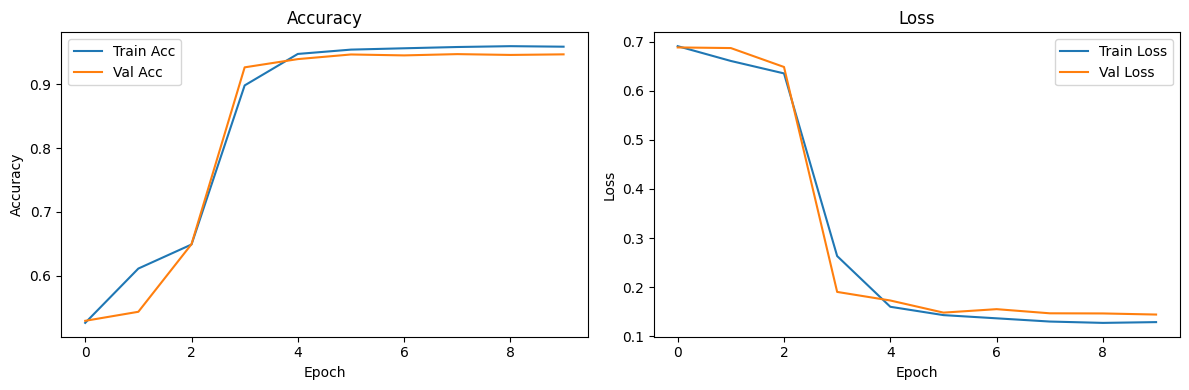

In [8]:

# Train the model
history = model.fit(
    train_set,
    validation_data=valid_set,
    epochs=10  # You can change this
)

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
model.evaluate(valid_set)

173/173 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.9457 - loss: 0.1403


[0.1439201831817627, 0.9468239545822144]

In [10]:
model.save('/kaggle/working/malaria.h5')  # Save in HDF5 format
